___
# Ciência dos Dados - PROJETO 1

## Lucca Delchiaro Costabile
___

## Como a posse de celulares e a presença de adultos vem interferindo no uso de internet em microcomputadores em familia com renda de até 1 salário minimo

___
## Introdução

Pretendo ver se existem relações relevantes entre a presença de crianças em casas e a preferencia de celulares ou microcomputadores para o uso da internet


___
## Análise e Resultados

In [1]:
#Se usar o arquivo descompactado
#pd.read_csv('DOM2015.csv',sep=',')
#########Se usar o arquivo compactado como está no dropbox púbico
#pd.read_csv('DOM2015csv.zip', compression='zip', header=0, sep=',', quotechar='"')

In [2]:
'''
Variaveis(2015):

Unidade da Federacao
Especie do domicilio
Tipo do domicilio
Condição de ocupação do domicílio
Tem telefone móvel celular
Tem telefone fixo convencional
Tem tablet
Tem acesso à Internet no próprio domicilio
Para acessar à Internet utiliza-se microcomputador
Para acessar à Internet utiliza-se telefone celular
Para acessar à Internet utiliza-se tablet
Rendimento mensal domiciliar per capita 
Faixa do rendimento mensal domiciliar per capita 
Total de moradores de 10 anos ou mais V0106 
 
'''
#Dados


'\nVariaveis(2015):\n\nUnidade da Federacao\nEspecie do domicilio\nTipo do domicilio\nCondição de ocupação do domicílio\nTem telefone móvel celular\nTem telefone fixo convencional\nTem tablet\nTem acesso à Internet no próprio domicilio\nPara acessar à Internet utiliza-se microcomputador\nPara acessar à Internet utiliza-se telefone celular\nPara acessar à Internet utiliza-se tablet\nRendimento mensal domiciliar per capita \nFaixa do rendimento mensal domiciliar per capita \nTotal de moradores de 10 anos ou mais V0106 \n \n'

In [3]:
#DF=pd.DataFrame({'V02324':Dados.V02324,
 #                'V02323':Dados.V02323,
  #              'V4622':Dados.V4622,
   #              'V4621':Dados.V4621,
    #             'V0220':Dados.V0220,
     #            'V0106':Dados.V0106
      #          })
#DF=pd.DataFrame({'Para acessar a Internet utiliza-se telefone celular':Dados.V02324,
#                 'Para acessar a Internet utiliza-se microcomputador':Dados.V02323,
#                'Faixa do rendimento mensal domiciliar per capita ':Dados.V4622,
#                 'Rendimento mensal domiciliar per capita ':Dados.V4621,
#                 'Tem telefone movel celular':Dados.V0220,
#                 'Total de moradores de 10 anos ou mais':Dados.V0106
#                })
#DF#.head(31)

In [4]:
#DF['Para acessar a Internet utiliza-se telefone celular'] = DF['Para acessar a Internet utiliza-se telefone celular'].astype('category')
#DF['Para acessar a Internet utiliza-se microcomputador']=DF['Para acessar a Internet utiliza-se microcomputador'].astype('category')
#DF['Faixa do rendimento mensal domiciliar per capita ']=DF['Faixa do rendimento mensal domiciliar per capita '].astype('category')
#DF['Tem telefone movel celular']=DF['Tem telefone movel celular'].astype('category')
#DF['Total de moradores de 10 anos ou mais']=DF['Total de moradores de 10 anos ou mais'].astype('category')

#DF.count()
#DF.dtypes

In [5]:
#DF.iloc[50:500,:]

In [6]:
#DF.to_csv("DFInicial.csv")

## CHECK 1

In [55]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [89]:
                                                      #PREPARAÇÃO#

#DEFINiÇÃO DO DATABASE

Dados1=pd.read_csv('DFInicial.csv',sep=',')

Dados1.dropna
#DECLARAÇÃO DAS VARIAVEIS QUALITATIVAS

Dados1['Para acessar a Internet utiliza-se telefone celular'] = Dados1['Para acessar a Internet utiliza-se telefone celular'].astype('category')
Dados1['Para acessar a Internet utiliza-se microcomputador']=Dados1['Para acessar a Internet utiliza-se microcomputador'].astype('category')
Dados1['Faixa do rendimento mensal domiciliar per capita ']=Dados1['Faixa do rendimento mensal domiciliar per capita '].astype('category')
Dados1['Tem telefone movel celular']=Dados1['Tem telefone movel celular'].astype('category')
#Jovens=Jovens.astype('category')


#NOME DAS QUALITATIVAS

Dados1['Para acessar a Internet utiliza-se telefone celular'].cat.categories = ('Sim','Não' )
Dados1['Para acessar a Internet utiliza-se microcomputador'].cat.categories = ('Sim','Não')
Dados1['Faixa do rendimento mensal domiciliar per capita '].cat.categories = ('Sem rendimento',
'Até ¼ salário mínimo',
'Mais de ¼ até ½ salário mínimo',
'Mais de ½ até 1 salário mínimo',
'Mais de 1 até  2 salários mínimos',
'Mais de  2 até  3 salários mínimos',
'Mais de 3 até 5 salários mínimos',
'Mais de 5 salários mínimos',
'Sem declaração'
)
Dados1['Tem telefone movel celular'].cat.categories = ('Sim','Não')
 

#Definição de variaveis para facilitar e retiragem dos "NaNs"

Jovens=Dados1['Total de moradores de 10 anos ou mais'] .dropna()
UsaCel=Dados1['Para acessar a Internet utiliza-se telefone celular'].dropna()
UsaPC=Dados1['Para acessar a Internet utiliza-se microcomputador'].dropna()
TemCel=Dados1['Tem telefone movel celular'].dropna()
FaixaRend=Dados1['Faixa do rendimento mensal domiciliar per capita '].dropna()
Rend=Dados1['Rendimento mensal domiciliar per capita '].dropna()
Jovens=Jovens.dropna()





In [90]:
UsaCel1=UsaCel.value_counts(True)
UsaCel1
#dados.EDUCACAO.value_counts(True)
#dados.EDUCACAO.value_counts(True)

Sim    0.928679
Não    0.071321
Name: Para acessar a Internet utiliza-se telefone celular, dtype: float64

In [91]:
UsaPC1=UsaPC.value_counts(True)
UsaPC1

Sim    0.677315
Não    0.322685
Name: Para acessar a Internet utiliza-se microcomputador, dtype: float64

In [92]:
TemCel1=TemCel.value_counts(True)
TemCel1

Sim    0.917076
Não    0.082924
Name: Tem telefone movel celular, dtype: float64

In [93]:
FaixaRend1=FaixaRend.value_counts(True)
FaixaRend1

Mais de ½ até 1 salário mínimo        0.303089
Mais de 1 até  2 salários mínimos     0.266367
Mais de ¼ até ½ salário mínimo        0.151706
Mais de  2 até  3 salários mínimos    0.080643
Até ¼ salário mínimo                  0.067459
Mais de 3 até 5 salários mínimos      0.056080
Mais de 5 salários mínimos            0.049237
Sem declaração                        0.019612
Sem rendimento                        0.005808
Name: Faixa do rendimento mensal domiciliar per capita , dtype: float64

In [169]:
CelEPc=pd.crosstab(UsaCel,UsaPC)
SoCel=Dados1[(Dados1['Para acessar a Internet utiliza-se telefone celular']=='Sim') &
             (Dados1['Para acessar a Internet utiliza-se microcomputador']=='Não') &
             (Dados1['Rendimento mensal domiciliar per capita ']!=999999999999)] 

SoPc=Dados1[(Dados1['Para acessar a Internet utiliza-se telefone celular']=='Não') &
            (Dados1['Para acessar a Internet utiliza-se microcomputador']=='Sim')&
            (Dados1['Rendimento mensal domiciliar per capita ']!=999999999999)]

In [170]:
SoPc

,Unnamed: 0,Faixa do rendimento mensal domiciliar per capita,Para acessar a Internet utiliza-se microcomputador,Para acessar a Internet utiliza-se telefone celular,Rendimento mensal domiciliar per capita,Tem telefone movel celular,Total de moradores de 10 anos ou mais
2,2,Mais de 1 até 2 salários mínimos,Sim,Não,1150.0,Sim,1.0
5,5,Mais de 2 até 3 salários mínimos,Sim,Não,1990.0,Não,1.0
19,19,Mais de ½ até 1 salário mínimo,Sim,Não,600.0,Sim,2.0
32,32,Mais de ¼ até ½ salário mínimo,Sim,Não,366.0,Sim,5.0
33,33,Até ¼ salário mínimo,Sim,Não,175.0,Sim,4.0
42,42,Mais de 1 até 2 salários mínimos,Sim,Não,975.0,Sim,4.0
43,43,Mais de 1 até 2 salários mínimos,Sim,Não,850.0,Sim,2.0
45,45,Mais de ½ até 1 salário mínimo,Sim,Não,480.0,Sim,4.0
197,197,Mais de ¼ até ½ salário mínimo,Sim,Não,297.0,Sim,2.0
272,272,Mais de 1 até 2 salários mínimos,Sim,Não,808.0,Sim,3.0


In [171]:
#SoCel['Rendimento mensal domiciliar per capita '].describe()

In [172]:
SoPc3=SoPc[SoPc["Total de moradores de 10 anos ou mais"]<=3]
SoPc5=SoPc[(SoPc["Total de moradores de 10 anos ou mais"]>3) & (SoPc["Total de moradores de 10 anos ou mais"]<=5)]
SoPc6=SoPc[SoPc["Total de moradores de 10 anos ou mais"]>5]

In [173]:
SoCel3=SoCel[SoCel["Total de moradores de 10 anos ou mais"]<=3]
SoCel5=SoCel[(SoCel["Total de moradores de 10 anos ou mais"]>3) & (SoCel["Total de moradores de 10 anos ou mais"]<=5)]
SoCel6=SoCel[SoCel["Total de moradores de 10 anos ou mais"]>5]

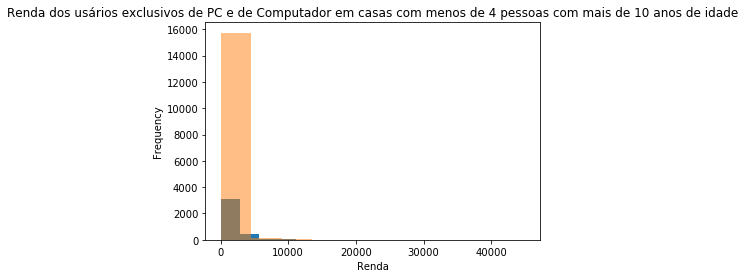

In [202]:
RendSoPc3=SoPc3['Rendimento mensal domiciliar per capita ']
RendSoPc3.plot.hist()
RendSoCel3=SoCel3['Rendimento mensal domiciliar per capita ']
RendSoCel3.plot.hist(Alpha=0.5,normed=0)
plt.xlabel('Renda')

plt.title('Renda dos usários exclusivos de PC e de Computador em casas com menos de 4 pessoas com mais de 10 anos de idade')


plt.show()


In [ ]:
RendSoPc5=SoPc5['Rendimento mensal domiciliar per capita ']
RendSoPc5.plot.hist()
RendSoCel5=SoCel5['Rendimento mensal domiciliar per capita ']
RendSoCel5.plot.hist(Alpha=0.5)
plt.xlabel('Renda')

plt.title('Renda dos usários exclusivos de PC e de Computador em casas com mais de 6 pessoas com mais de 10 anos de idade')


plt.show()

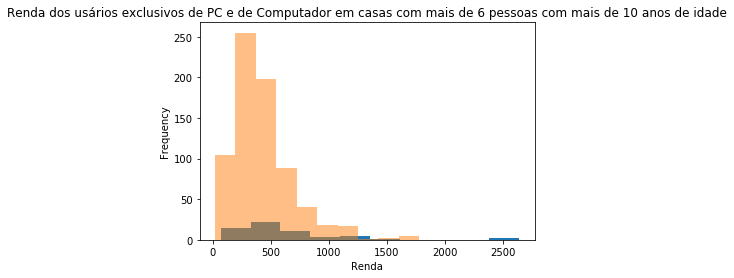

In [203]:
RendSoPc6=SoPc6['Rendimento mensal domiciliar per capita ']
RendSoPc6.plot.hist()
RendSoCel6=SoCel6['Rendimento mensal domiciliar per capita ']
RendSoCel6.plot.hist(Alpha=0.5)
plt.xlabel('Renda')

plt.title('Renda dos usários exclusivos de PC e de Computador em casas com mais de 6 pessoas com mais de 10 anos de idade')


plt.show()

Descreva aqui suas conclusões!